This is the 1st Project for Data Cleaning - Transformation - Analysis in VS Code with Python.

We have created our Kernel - Virtual Environment with command prompt and installed all necessary libraries.

Extra plug-ins data wrangler for better data structure and pattern understanting.

Our dataset contains data for 1 day (2023-01-01, 00:00 - 02:46:39), 11 columns and 10k records.

In [531]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [532]:
%cd C:\Users\lefte\datasets


C:\Users\lefte\datasets


*  Data Exploration Part *

In [533]:
silver_fraud_data = pd.read_csv('fraud_analysis.csv')
silver_fraud_data.head() # open with dara wrangler notebook to see the data structure and identify any issues or patterns in the data.

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,1015,2053,1901.56,2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,1004,2035,1248.86,2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,1095,2037,7619.05,2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
4,5,1036,2083,1890.10,2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083


In [534]:
#assign dataset to new data to keep the original data intact
gold_fraud_data = silver_fraud_data.copy()
gold_fraud_data.info() # check variables/column types and number of records in the dataset. This will help us identify any data cleaning or preprocessing steps that may be necessary before conducting our analysis.

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           10000 non-null  int64  
 1   customer_id              10000 non-null  int64  
 2   merchant_id              10000 non-null  int64  
 3   amount                   10000 non-null  float64
 4   transaction_time         10000 non-null  str    
 5   is_fraudulent            10000 non-null  int64  
 6   card_type                10000 non-null  str    
 7   location                 10000 non-null  str    
 8   purchase_category        10000 non-null  str    
 9   customer_age             10000 non-null  int64  
 10  transaction_description  10000 non-null  str    
dtypes: float64(1), int64(5), str(5)
memory usage: 859.5 KB


In [535]:
gold_fraud_data.describe() # get summary statistics for the dataset. This will help us understand the distribution of the data and identify any outliers or anomalies that may be present.
 # for numeric variables, discrete or continuous.

,transaction_id,customer_id,merchant_id,amount,is_fraudulent,customer_age
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1051.272300,2050.486600,4958.381617,0.506800,44.047500
std,2886.89568,28.864062,28.877801,2899.699675,0.499979,15.321707
min,1.00000,1001.000000,2001.000000,10.610000,0.000000,18.000000
25%,2500.75000,1026.000000,2025.000000,2438.175000,0.000000,31.000000
50%,5000.50000,1052.000000,2050.000000,4943.945000,1.000000,44.000000
75%,7500.25000,1076.000000,2076.000000,7499.312500,1.000000,57.000000
max,10000.00000,1100.000000,2100.000000,9999.750000,1.000000,70.000000


Quick look after describe(): About 50,68% of transactions are fraud. Average age of customers 44. Avg transaction 5k rounded. 

In [536]:
#check for missing values in the dataset

gold_fraud_data.isnull().sum()

#No presence of missing values.

transaction_id             0
customer_id                0
merchant_id                0
amount                     0
transaction_time           0
is_fraudulent              0
card_type                  0
location                   0
purchase_category          0
customer_age               0
transaction_description    0
dtype: int64

In [537]:
#check duplicate records in the dataset.
gold_fraud_data.duplicated().sum()

np.int64(0)

In [538]:
#checking the distinct values. #for categorical variables (str type)
gold_fraud_data.nunique()       


transaction_id             10000
customer_id                  100
merchant_id                  100
amount                      9945
transaction_time           10000
is_fraudulent                  2
card_type                      4
location                      50
purchase_category              6
customer_age                  53
transaction_description      100
dtype: int64

In [539]:
#merchant_id col and transaction_description col describes the same thing, the merchant. So we will drop the 2nd column and keep the merchant_id col since it has less distinct values and is more concise.
gold_fraud_data.drop('transaction_description', axis=1, inplace=True)

In [540]:
# check classes of the card_type variable to see if there are any inconsistencies or errors in the data.
gold_fraud_data['card_type'].unique()



<StringArray>
['MasterCard', 'Visa', 'Discover', 'American Express']
Length: 4, dtype: str

In [541]:
#same as above
gold_fraud_data['purchase_category'].unique()

<StringArray>
['Gas Station', 'Online Shopping', 'Travel', 'Retail', 'Groceries',
 'Restaurant']
Length: 6, dtype: str

* Data Cleaning & Transformation *

Columns:
1. location: We keep the numbers and exclude "City-" for easier analysis and understanding.
2. Amount: Convert values from float to int for easier calculation.
3. customer_age: We group the customers into meaningful clusters.
4. Transaction_time: Convert str to datetime

In [542]:
# Exluding "City-"  from the location column to get only the city code.
gold_fraud_data["location"] = gold_fraud_data["location"].str.split("-").str[1]

#Convert amount col from float to integer by rounding up the values for easier analysis.
gold_fraud_data['amount'] = np.ceil(gold_fraud_data['amount']).astype(int)

#We rename the column location to city_location for better understanding of the data.
gold_fraud_data.rename(columns={"location": "city_location"}, inplace=True)


In [543]:
gold_fraud_data["customer_age"].describe()

count    10000.000000
mean        44.047500
std         15.321707
min         18.000000
25%         31.000000
50%         44.000000
75%         57.000000
max         70.000000
Name: customer_age, dtype: float64

In [544]:
gold_fraud_data["customer_age"] = pd.cut(gold_fraud_data["customer_age"],bins=[17, 25, 35, 50, 65, 70],     labels=["18-25", "26-35", "36-50", "51-65", "66-70"])

In [545]:
gold_fraud_data["transaction_time"] = pd.to_datetime(gold_fraud_data["transaction_time"])

** EDA **

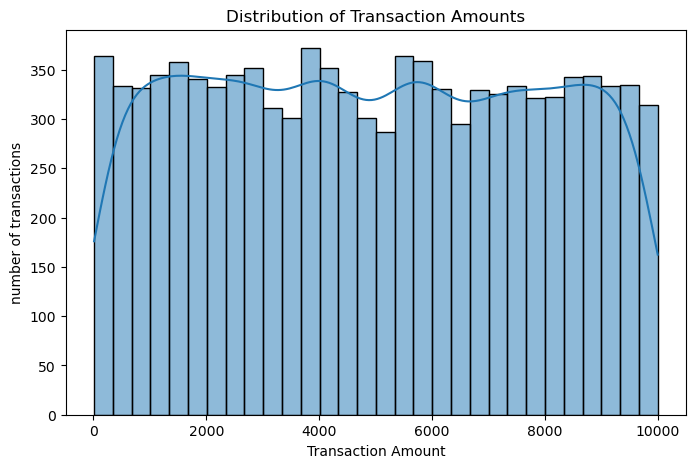

In [546]:
#Checking the distribution of transaction amounts.
plt.figure(figsize=(8,5))
sns.histplot(gold_fraud_data['amount'], bins=30, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("number of transactions")
plt.show()

#No extreme spikes. Transaction amounts almost evenly distributed. 

In [547]:
#Get number of transactions which are fraud.
fraud_card = (gold_fraud_data[gold_fraud_data['is_fraudulent'] == 1].groupby('card_type').size().sort_values(ascending=False))

In [548]:
#convert to percentage
fraud_card = (fraud_card/100) / sum(fraud_card/100) * 100

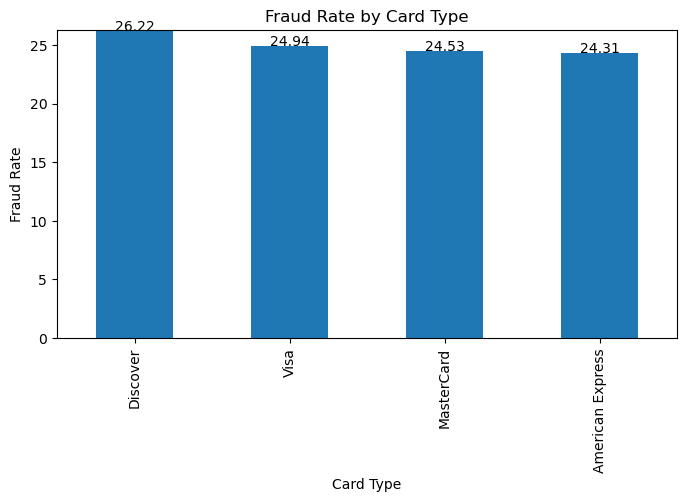

In [549]:
#Visualizing the fraud rate by card type using a bar chart.
plt.figure(figsize=(8,4))
ax = fraud_card.plot(kind='bar')

plt.title("Fraud Rate by Card Type")
plt.ylabel("Fraud Rate")
plt.xlabel("Card Type")

# Add value labels on top of bars
for i, value in enumerate(fraud_card):ax.text(i, value + 0.005, f"{value:.2f}", ha='center')

plt.ylim(0, fraud_card.max() + 0.05)
plt.show()

#We see that the fraud rate is higher for "Discover" Card while for the  other card types, the fraud rates are relatively similar. 

In [550]:
fraud_customer_age = (gold_fraud_data[gold_fraud_data['is_fraudulent'] == 1].groupby('customer_age').size().sort_values(ascending=False))

In [551]:
fraud_customer_age = (fraud_customer_age/100) / sum(fraud_customer_age/100) * 100 
fraud_customer_age = fraud_customer_age.round(2).sort_index() 
fraud_customer_age


customer_age
18-25    15.79
26-35    18.78
36-50    27.62
51-65    28.37
66-70     9.43
dtype: float64

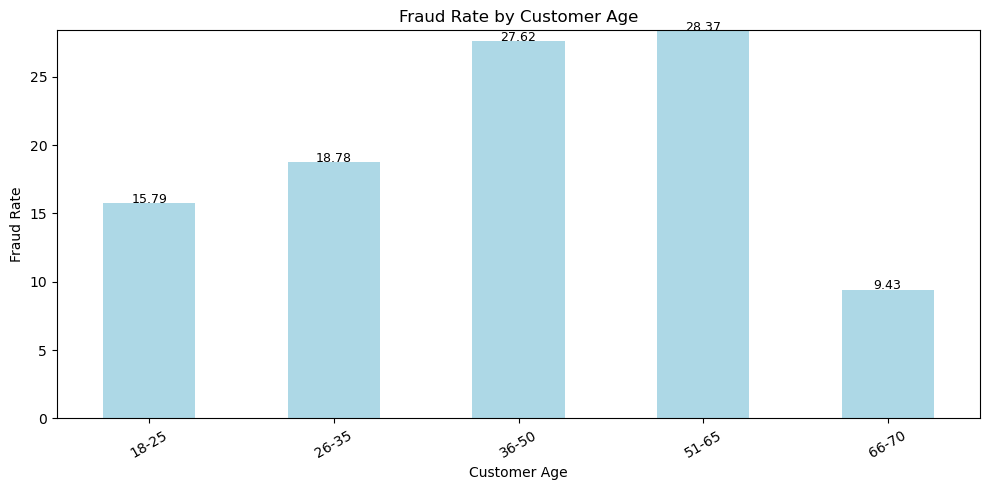

In [552]:
#Visualizing the fraud rate by customer age using a bar chart.
plt.figure(figsize=(10,5))

fraud_customer_age_sorted = fraud_customer_age.sort_index()

ax = fraud_customer_age_sorted.plot(
    kind='bar',
    color='lightblue',
    width=0.5)

plt.title("Fraud Rate by Customer Age")
plt.ylabel("Fraud Rate")
plt.xlabel("Customer Age")

plt.xticks(rotation=30)

for i, value in enumerate(fraud_customer_age_sorted):ax.text(i, value + 0.002, f"{value:.2f}", ha='center', fontsize=9)

plt.ylim(0, fraud_customer_age_sorted.max() + 0.02)

plt.tight_layout()
plt.show()

#We notice that the fraud rate is higher for the age group 51-65 and 36-50 with 0.28% and 0.27% respectively. 

In [553]:
fraud_city_location = (gold_fraud_data[gold_fraud_data['is_fraudulent'] == 1].groupby('city_location').size().sort_values(ascending=False).head(5))  

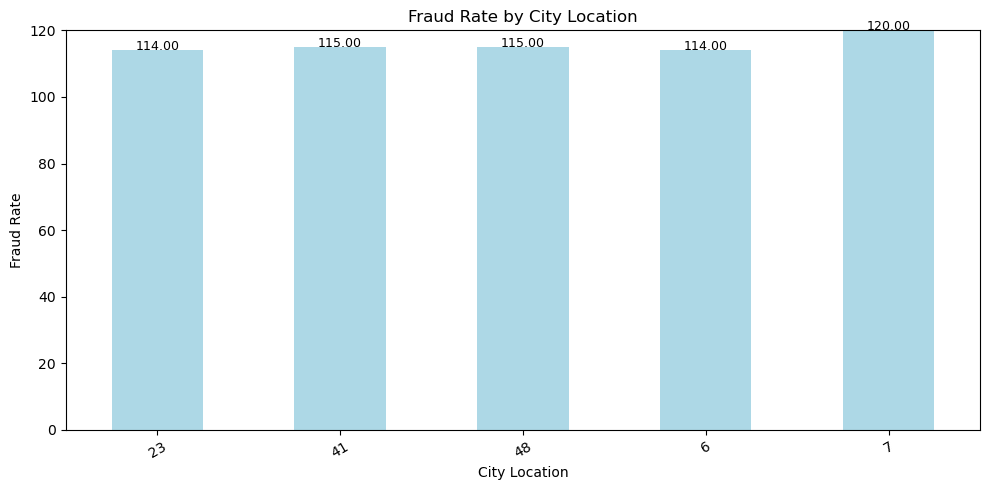

In [554]:
#Checking the fraud rate by city location.
plt.figure(figsize=(10,5))

fraud_city_location_sorted = fraud_city_location.sort_index()

ax = fraud_city_location_sorted.plot(
    kind='bar',
    color='lightblue',
    width=0.5)

plt.title("Fraud Rate by City Location")
plt.ylabel("Fraud Rate")
plt.xlabel("City Location")

plt.xticks(rotation=30)

for i, value in enumerate(fraud_city_location_sorted):ax.text(i, value + 0.002, f"{value:.2f}", ha='center', fontsize=9)

plt.ylim(0, fraud_city_location_sorted.max() + 0.02)

plt.tight_layout()
plt.show()

#We see that city 7 is the leader of fraud transactions with 120 followed by city 41 and 48 with 115 cases.

In [555]:
fraud_purchase_category = (gold_fraud_data[gold_fraud_data['is_fraudulent'] == 1].groupby('purchase_category').size().sort_values(ascending=False).head(5))  

In [556]:
fraud_purchase_category = (fraud_purchase_category/100) / sum(fraud_purchase_category/100) * 100 
fraud_purchase_category = fraud_purchase_category.round(2).sort_index() 
fraud_purchase_category

purchase_category
Gas Station        20.41
Groceries          20.92
Online Shopping    18.77
Retail             19.92
Travel             19.99
dtype: float64

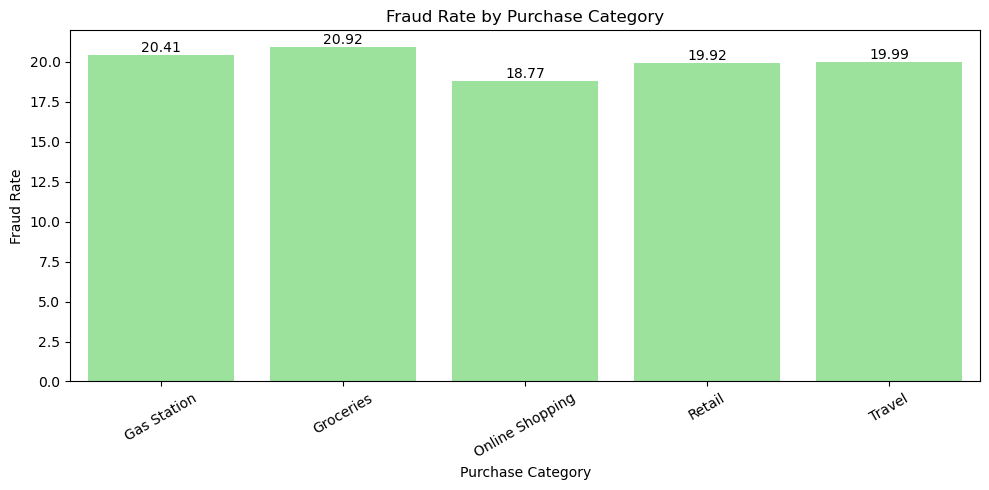

In [557]:
#Checking the fraud rate by purchase category.
fraud_purchase_category_sorted = fraud_purchase_category.sort_index()

plt.figure(figsize=(10,5))

ax = sns.barplot(
    x=fraud_purchase_category_sorted.index,
    y=fraud_purchase_category_sorted.values,
    color='lightgreen'
)

plt.title("Fraud Rate by Purchase Category")
plt.ylabel("Fraud Rate")
plt.xlabel("Purchase Category")
plt.xticks(rotation=30)


for i, value in enumerate(fraud_purchase_category_sorted.values):
    ax.text(i, value, f"{value:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()
#We see that fraud rate is higher for "groceries" and "Gas Station" with almost 21% and 20.4% correspondongly.


** End-to-End Fraud Analytics: Merchant, Customer, Behavioral & Revenue Risk Analysis **

In [558]:
gold_fraud_data.groupby('is_fraudulent')['amount'].describe().round()

,count,mean,std,min,25%,50%,75%,max
is_fraudulent,,,,,,,,
0,4932.0,4944.0,2885.0,12.0,2450.0,4958.0,7456.0,9999.0
1,5068.0,4974.0,2914.0,11.0,2423.0,4922.0,7533.0,10000.0


In [559]:

#Merchant Metrics and Risk Assessment
merchant_metrics = (
    gold_fraud_data
    .groupby('merchant_id')
    .apply(lambda g: pd.Series({
        'total_transactions': len(g),
        'total_revenue': g['amount'].sum(),
        'fraud_transactions_count': g['is_fraudulent'].sum(),
        'fraud_rate': g['is_fraudulent'].mean().round(2),
        'fraud_amount': g.loc[g['is_fraudulent'] == 1, 'amount'].sum(),
        'nonfraud_amount': g.loc[g['is_fraudulent'] == 0, 'amount'].sum(),
        'avg_amount': g['amount'].mean().round(2)
    }))
    .reset_index().sort_values(by='fraud_rate', ascending=False)
)

merchant_metrics.head()


,merchant_id,total_transactions,total_revenue,fraud_transactions_count,fraud_rate,fraud_amount,nonfraud_amount,avg_amount
68,2069,109.0,532007.0,70.0,0.64,340559.0,191448.0,4880.80
66,2067,102.0,463598.0,65.0,0.64,291470.0,172128.0,4545.08
67,2068,84.0,440420.0,53.0,0.63,302235.0,138185.0,5243.10
32,2033,82.0,429954.0,51.0,0.62,264692.0,165262.0,5243.34
8,2009,92.0,477703.0,57.0,0.62,278624.0,199079.0,5192.42


In [560]:
#Getting the top merchants with fraud rate over 55% to identify extreme-high-risk merchants.
top_merchants_by_rate_over_55 = (
    merchant_metrics[merchant_metrics['fraud_rate'] >= 0.55]
    .sort_values('fraud_rate', ascending=False)
)
len(top_merchants_by_rate_over_55)


18

In [561]:
#Unique merchants in the dataset.
gold_fraud_data['merchant_id'].nunique()

#100 unique merchants in the dataset. 

100

In [562]:
print(len(top_merchants_by_rate_over_55) /  gold_fraud_data['merchant_id'].nunique() * 100, "of merchants have a fraud rate over 55%.")

18.0 of merchants have a fraud rate over 55%.


In [563]:
#Getting the Top 10 merchants with fraud rate over 55% [fraud_rate] to identify Extreme-high-risk merchants.
top_merchants_by_rate_over_55.head(10)

,merchant_id,total_transactions,total_revenue,fraud_transactions_count,fraud_rate,fraud_amount,nonfraud_amount,avg_amount
68,2069,109.0,532007.0,70.0,0.64,340559.0,191448.0,4880.80
66,2067,102.0,463598.0,65.0,0.64,291470.0,172128.0,4545.08
67,2068,84.0,440420.0,53.0,0.63,302235.0,138185.0,5243.10
32,2033,82.0,429954.0,51.0,0.62,264692.0,165262.0,5243.34
8,2009,92.0,477703.0,57.0,0.62,278624.0,199079.0,5192.42
99,2100,75.0,407754.0,46.0,0.61,248816.0,158938.0,5436.72
84,2085,115.0,590038.0,67.0,0.58,329572.0,260466.0,5130.77
73,2074,107.0,552164.0,62.0,0.58,349251.0,202913.0,5160.41
4,2005,89.0,464353.0,51.0,0.57,273106.0,191247.0,5217.45
92,2093,107.0,547735.0,60.0,0.56,306604.0,241131.0,5119.02


In [564]:
# Here we check the top merchants by total fraud amount to identify the merchants with the highest financial losses due to fraud.
top_merchants_by_loss = merchant_metrics.sort_values('fraud_amount', ascending=False).head(10)
top_merchants_by_loss

,merchant_id,total_transactions,total_revenue,fraud_transactions_count,fraud_rate,fraud_amount,nonfraud_amount,avg_amount
77,2078,120.0,658608.0,67.0,0.56,370034.0,288574.0,5488.40
73,2074,107.0,552164.0,62.0,0.58,349251.0,202913.0,5160.41
68,2069,109.0,532007.0,70.0,0.64,340559.0,191448.0,4880.80
84,2085,115.0,590038.0,67.0,0.58,329572.0,260466.0,5130.77
56,2057,117.0,595402.0,63.0,0.54,321151.0,274251.0,5088.91
26,2027,112.0,556115.0,58.0,0.52,318855.0,237260.0,4965.31
22,2023,104.0,512888.0,57.0,0.55,310564.0,202324.0,4931.62
94,2095,115.0,594560.0,61.0,0.53,309874.0,284686.0,5170.09
60,2061,114.0,595062.0,60.0,0.53,306720.0,288342.0,5219.84
92,2093,107.0,547735.0,60.0,0.56,306604.0,241131.0,5119.02


In [565]:
# Get Customer Metrics and Risk Assessment
customer_metrics = (
    gold_fraud_data
    .groupby('customer_id')
    .apply(lambda g: pd.Series({
        'total_transactions': len(g),
        'total_spent': g['amount'].sum(),
        'fraud_transactions_count': g['is_fraudulent'].sum(),
        'fraud_rate': g['is_fraudulent'].mean().round(2),
        'fraud_amount': g.loc[g['is_fraudulent'] == 1, 'amount'].sum(),
    }))
    .reset_index().sort_values(by='fraud_rate', ascending=False)
)
customer_metrics.head()

,customer_id,total_transactions,total_spent,fraud_transactions_count,fraud_rate,fraud_amount
10,1011,100.0,492378.0,60.0,0.60,279223.0
3,1004,87.0,442311.0,51.0,0.59,235081.0
70,1071,113.0,555678.0,67.0,0.59,312892.0
77,1078,94.0,464172.0,55.0,0.59,295428.0
44,1045,96.0,498355.0,56.0,0.58,267355.0


In [566]:
# Let's check the Top 10 repeat offenders, customers with multiple fraudulent transactions, to identify high-risk customers.
repeat_fraudsters = customer_metrics[
    (customer_metrics['fraud_rate'] >= 0.55)
].sort_values(['fraud_rate'], ascending=False)

repeat_fraudsters.head(10)

,customer_id,total_transactions,total_spent,fraud_transactions_count,fraud_rate,fraud_amount
10,1011,100.0,492378.0,60.0,0.60,279223.0
3,1004,87.0,442311.0,51.0,0.59,235081.0
70,1071,113.0,555678.0,67.0,0.59,312892.0
77,1078,94.0,464172.0,55.0,0.59,295428.0
44,1045,96.0,498355.0,56.0,0.58,267355.0
65,1066,84.0,400438.0,48.0,0.57,213178.0
29,1030,87.0,429984.0,50.0,0.57,248413.0
60,1061,115.0,595631.0,64.0,0.56,322246.0
30,1031,100.0,507544.0,56.0,0.56,293207.0
16,1017,100.0,525001.0,56.0,0.56,301286.0


In [567]:
# Finally, we analyze the customer-merchant pairs to identify any specific combinations that are particularly high-risk in terms of fraud amount.
top_pairs_by_loss = (
    gold_fraud_data[gold_fraud_data['is_fraudulent'] == 1]
    .groupby(['customer_id', 'merchant_id'])
    .agg(
        fraud_transaction_count=('amount', 'count'),
        fraud_amount=('amount', 'sum')
    )
    .sort_values('fraud_amount', ascending=False)
    .head(5)
)

top_pairs_by_loss

,,fraud_transaction_count,fraud_amount
customer_id,merchant_id,,
1030,2085,3,27156
1011,2009,3,27114
1004,2004,3,26015
1082,2022,3,25453
1098,2016,5,25203


In [568]:
# Here, we analyze the fraud metrics by purchase category to identify which categories are most affected by fraud in terms of transaction count, revenue, and financial losses.
category_metrics = (
    gold_fraud_data
    .groupby('purchase_category')
    .apply(lambda g: pd.Series({
        'total_transactions': len(g),
        'total_revenue': g['amount'].sum(),
        'fraud_transaction_count': g['is_fraudulent'].sum(),
        'fraud_rate': g['is_fraudulent'].mean().round(3),
        'fraud_amount': g.loc[g['is_fraudulent'] == 1, 'amount'].sum()
    }))
    .sort_values('fraud_rate', ascending=False)
)

category_metrics

# TOP 3 purchase categories by fraud rate are Groceries, Gas Station and Retail.


,total_transactions,total_revenue,fraud_transaction_count,fraud_rate,fraud_amount
purchase_category,,,,,
Groceries,1692.0,8499020.0,896.0,0.530,4473856.0
Gas Station,1666.0,8235157.0,874.0,0.525,4339792.0
Retail,1661.0,8144207.0,853.0,0.514,4218537.0
Travel,1694.0,8427719.0,856.0,0.505,4245318.0
Online Shopping,1651.0,8289766.0,804.0,0.487,4028652.0
Restaurant,1636.0,7992895.0,785.0,0.480,3900181.0


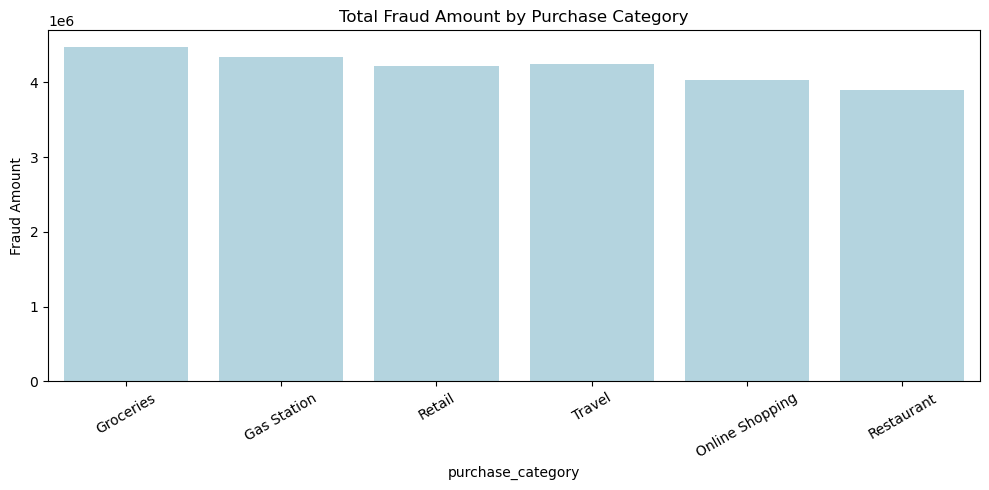

In [569]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=category_metrics.index, y=category_metrics['fraud_amount'], color='lightblue')
plt.xticks(rotation=30)
plt.title("Total Fraud Amount by Purchase Category")
plt.ylabel("Fraud Amount")
plt.tight_layout()
plt.show()

In [ ]:
## TIME-WINDOWED FRAUD BURST ANALYSIS   

#We create a new table with only fraudulent transactions.
fraud_only = gold_fraud_data[gold_fraud_data['is_fraudulent'] == 1].copy()

#We create a new column that rounds the transaction time down to the nearest 10-minute interval to analyze fraud patterns in specific time windows.
fraud_only['time_10min'] = (fraud_only['transaction_time'].dt.floor('10min'))



In [ ]:
#Here, we group the fraudulent transactions by the 10-minute time intervals and count the number of fraud transactions in each interval to identify any time windows with a high concentration of fraud activity.
fraud_bins = (
    fraud_only
    .groupby('time_10min')
    .size()
    .reset_index(name='fraud_transaction_count')
    .sort_values('time_10min')
)

In [612]:
fraud_bins.head(2)

,time_10min,fraud_transaction_count
0,2023-01-01 00:00:00,295
1,2023-01-01 00:10:00,296


In [ ]:
#We get the top 5 time windows with the highest number of fraud transactions 
top5 = fraud_bins.nlargest(5, 'fraud_transaction_count')

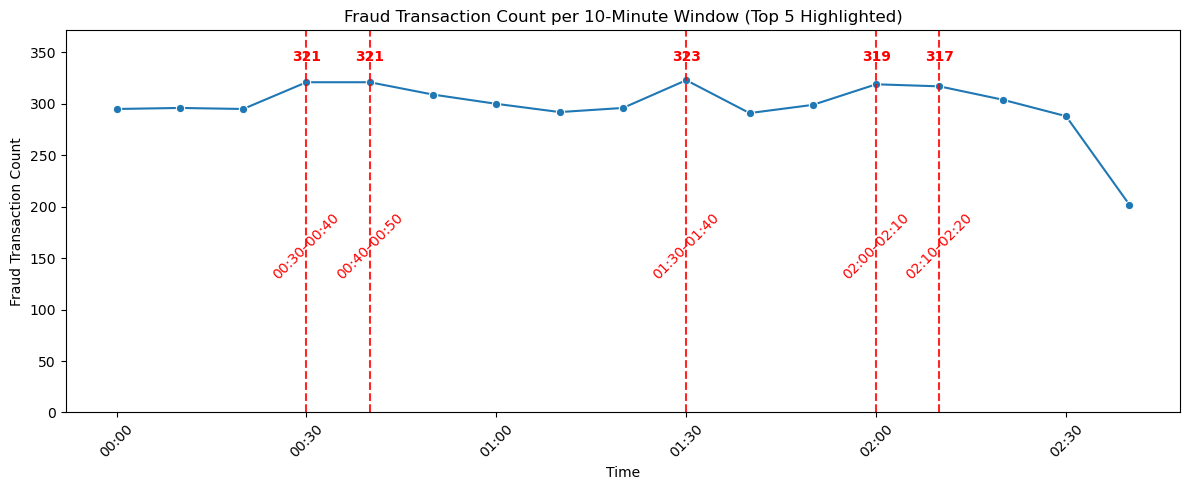

In [ ]:
# Create window label like "00:30–00:40"
top5['window_label'] = (
    top5['time_10min'].dt.strftime('%H:%M') + "–" +
    (top5['time_10min'] + pd.Timedelta(minutes=10)).dt.strftime('%H:%M')
)

plt.figure(figsize=(12,5))

# Main line
sns.lineplot(
    data=fraud_bins,
    x='time_10min',
    y='fraud_transaction_count',
    marker='o'
)

y_max = fraud_bins['fraud_transaction_count'].max()

for _, row in top5.iterrows():
    x = row['time_10min']
    c = row['fraud_transaction_count']
    lbl = row['window_label']

    # Red vertical line
    plt.axvline(x=x, color='red', linestyle='--', alpha=0.85)

    # Count at the TOP
    plt.text(
        x, y_max * 1.05,
        f"{int(c)}",
        color='red',
        ha='center',
        va='bottom',
        fontweight='bold'
    )

    # Time window in the CENTER, diagonal
    plt.text(
        x,
        y_max * 0.5,          # middle of chart
        lbl,
        color='red',
        ha='center',
        va='center',
        rotation=45           # diagonal
    )

plt.title("Fraud Transaction Count per 10-Minute Window (Top 5 Highlighted)")
plt.xlabel("Time")
plt.ylabel("Fraud Transaction Count")

plt.gca().xaxis.set_major_formatter(
    plt.matplotlib.dates.DateFormatter('%H:%M')
)

plt.ylim(0, y_max * 1.15)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#In the below line chart, we can see the top 5 time windows with the highest number of fraud transactions.

In [ ]:
#Now, we want to check the fraud rate per purchase category for each card type.
interaction_card_category = (
    gold_fraud_data
    .groupby(['card_type', 'purchase_category'])['is_fraudulent']
    .mean()
    .round(2)
    .unstack()
)

purchase_category,Gas Station,Groceries,Online Shopping,Restaurant,Retail,Travel
card_type,,,,,,
American Express,0.55,0.50,0.46,0.46,0.49,0.51
Discover,0.52,0.54,0.46,0.49,0.50,0.53
MasterCard,0.53,0.56,0.52,0.47,0.55,0.50
Visa,0.51,0.53,0.51,0.50,0.51,0.48


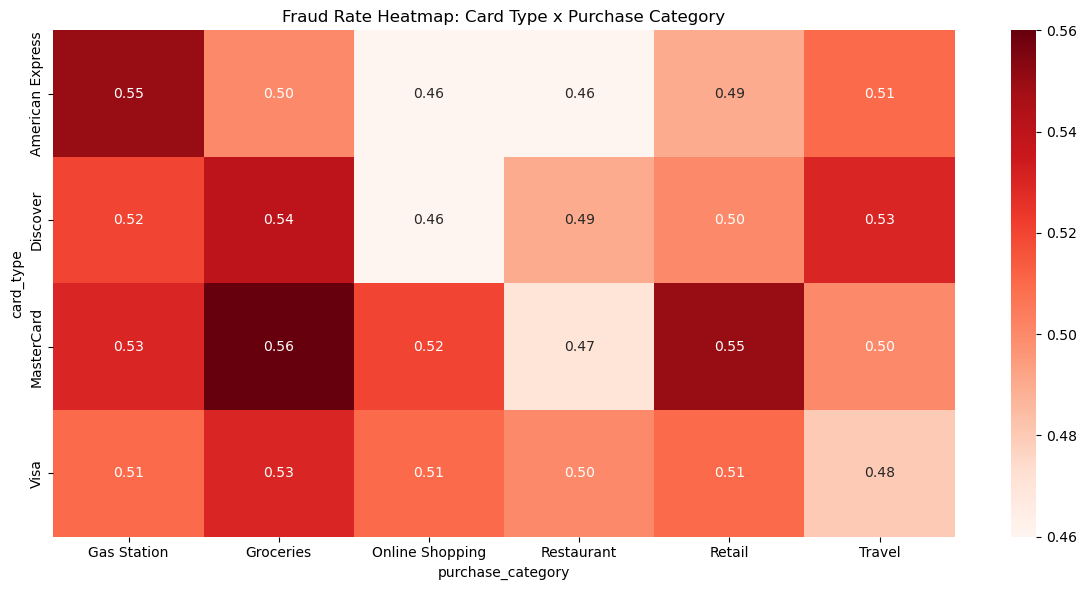

In [ ]:
#In the below plot we identify the fraud interaction between card type and purchase category.
plt.figure(figsize=(12,6))

sns.heatmap(
    interaction_card_category,
    annot=True,
    fmt=".2f",
    cmap="Reds",      
    cbar=True
)

plt.title("Fraud Rate Heatmap: Card Type x Purchase Category")
plt.tight_layout()
plt.show()

#Mastercard has thehighest feaud rates for groceries and retail while American express fraud cases have beem detected dominantly in gas stations.

In [627]:

## Revenue Impact Analysis (total revenue, total fraud loss and loss percentage)
total_revenue = gold_fraud_data['amount'].sum()
total_fraud_loss = gold_fraud_data.loc[gold_fraud_data['is_fraudulent'] == 1, 'amount'].sum()
loss_pct = ((total_fraud_loss / total_revenue) * 100).round(2)

total_revenue, total_fraud_loss, loss_pct

(np.int64(49588764), np.int64(25206336), np.float64(50.83))

END OF ANALYSIS


Summary:
This project analyzes 10,000 fraud-related transactions from a single day using Python in VS Code. After cleaning and transforming the data, exploratory and advanced analyses were performed across merchants, customers, categories, locations, and time windows. Results show fraud concentration in specific segments and time intervals. Overall fraud accounts for 50.83% of total transaction value.

Comments: 
The dataset used in this analysis was synthetically generated and therefore does not represent real-world behavior. As a result, some patterns or results may appear unusual or unrealistic. However, the primary objective of this work is to demonstrate the analytical methodology, structured reasoning, and critical thinking applied throughout the fraud investigation process.